In [9]:
import sys
sys.path.append('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/dhnlplotting/util')

import glob
import os
from plot_base import PlotBase
from IPython.display import display, Image
import ROOT
ROOT.gROOT.SetStyle("ATLAS")
from array import array
import importlib
import plot_base
import plot_util
import numpy as np
importlib.reload(plot_base)
importlib.reload(plot_util)

# ____________________________________________________________
# Get histograms

displaced_lepton_syst_d0_bins = [0, 3, 10, 20, 30, 40, 50, 60]
bins = array('f', displaced_lepton_syst_d0_bins)
nbins = len(bins) - 1
overflow_bin = nbins + 1

try:
    for obj_name in ["h_abs_d0_all_el", "h_abs_d0_selected_el", "h_abs_d0_all_mu", "h_abs_d0_selected_mu"]:
        ROOT.gROOT.FindObject(obj_name).Delete()
except:
    pass

el_denom = ROOT.TH1F("h_abs_d0_all_el","All electrons", nbins, bins) 
el_num = ROOT.TH1F("h_abs_d0_selected_el","Selected Electrons", nbins, bins) 
mu_denom = ROOT.TH1F("h_abs_d0_all_mu","All muons", nbins, bins) 
mu_num = ROOT.TH1F("h_abs_d0_selected_mu","Selected muons", nbins, bins) 

trees = []

var_name = 'd0'
# var_name = 'd0_truth'

for filename in glob.glob('/data/hnl/histograms/v5p0_histograms/histograms_mc16a_*.root'):
    for f in [
        filename, 
        filename.replace('mc16a', 'mc16d'), 
        filename.replace('mc16a', 'mc16e'), 
        ]: 
        if var_name == 'd0_truth' and 'mc16a' in f:
            continue # Truth d0 is NAN for mc16a for some reason. Causes overflow issues.
        if not os.path.isfile(f):
            print('missing', f)
            continue
        tfile = ROOT.TFile(f)
        tfile.cd()
        trees.append(tfile)

        for treename in ['VSI_LeptonsMod_ntuples_LNV_DVtype', 'VSI_LeptonsMod_ntuples_LNC_DVtype']:
            tree = tfile.Get(treename)
            trees.append(tree)

            # denom
            abs_d0_all_lep0 = ROOT.TH1F("h_abs_d0_all_lep0","h_abs_d0_all_lep0", nbins, bins)
            tree.Draw(f"abs(DV_trk_0_{var_name})>>h_abs_d0_all_lep0","", "")
            abs_d0_all_lep1 = ROOT.TH1F("h_abs_d0_all_lep1","h_abs_d0_all_lep1", nbins, bins)
            tree.Draw(f"abs(DV_trk_1_{var_name})>>h_abs_d0_all_lep1","", "")

            # both are muons
            if 'uuu' in f: 
                mu_denom.Add(abs_d0_all_lep0)
                mu_denom.Add(abs_d0_all_lep1)
                quality_requirement_0 = 'DV_lep_0_muon_isMedium>=1'
                quality_requirement_1 = 'DV_lep_1_muon_isMedium>=1'

            # both are electrons
            if 'eee' in f: 
                el_denom.Add(abs_d0_all_lep0)
                el_denom.Add(abs_d0_all_lep1)
                quality_requirement_0 = 'DV_lep_0_electron_VeryVeryLoose>=1'
                quality_requirement_1 = 'DV_lep_1_electron_VeryVeryLoose>=1'

            if 'uue' in f or 'eeu' in f: # in mixed DVs
                mu_denom.Add(abs_d0_all_lep0) # lep0 is always the muon
                el_denom.Add(abs_d0_all_lep1) # lep1 is always the electron
                quality_requirement_0 = 'DV_lep_0_muon_isMedium>=1'
                quality_requirement_1 = 'DV_lep_1_electron_VeryVeryLoose>=1'

            # num
            abs_d0_sel_lep0 = ROOT.TH1F("h_abs_d0_sel_lep0", "h_abs_d0_sel_lep0", nbins, bins) 
            tree.Draw(f"abs(DV_trk_0_{var_name})>>h_abs_d0_sel_lep0", quality_requirement_0, "")
            abs_d0_sel_lep1 = ROOT.TH1F("h_abs_d0_sel_lep1", "h_abs_d0_sel_lep1", nbins, bins)
            tree.Draw(f"abs(DV_trk_1_{var_name})>>h_abs_d0_sel_lep1", quality_requirement_1, "")

            if 'uuu' in f:
                mu_num.Add(abs_d0_sel_lep0)
                mu_num.Add(abs_d0_sel_lep1)
            if 'eee' in f:
                el_num.Add(abs_d0_sel_lep0)
                el_num.Add(abs_d0_sel_lep1)
            if 'uue' in f or 'eeu' in f: 
                mu_num.Add(abs_d0_sel_lep0) 
                el_num.Add(abs_d0_sel_lep1)

            ROOT.gROOT.FindObject("h_abs_d0_sel_lep0").Delete()
            ROOT.gROOT.FindObject("h_abs_d0_sel_lep1").Delete()
            ROOT.gROOT.FindObject("h_abs_d0_all_lep0").Delete()
            ROOT.gROOT.FindObject("h_abs_d0_all_lep1").Delete()
        # for treename
        tfile.Close()
    # for f
    # break
# for filename

print(el_num, el_num.GetEntries())
print(mu_num, mu_num.GetEntries())
print(el_denom, el_denom.GetEntries())
print(mu_denom, mu_denom.GetEntries())

# move overflow content into last visible bin
for h in [el_denom, el_num, mu_denom, mu_num]:
    print( h[overflow_bin-1], '+', h[overflow_bin])
    h.SetBinContent(overflow_bin-1, h[overflow_bin-1] + h[overflow_bin])
    h.SetBinContent(overflow_bin, 0)  



Name: h_abs_d0_selected_el Title: Selected Electrons NbinsX: 7 119590.0
Name: h_abs_d0_selected_mu Title: Selected muons NbinsX: 7 192356.0
Name: h_abs_d0_all_el Title: All electrons NbinsX: 7 134872.0
Name: h_abs_d0_all_mu Title: All muons NbinsX: 7 201244.0
864.0 + 1843.0
760.0 + 1544.0
720.0 + 1501.0
668.0 + 1363.0


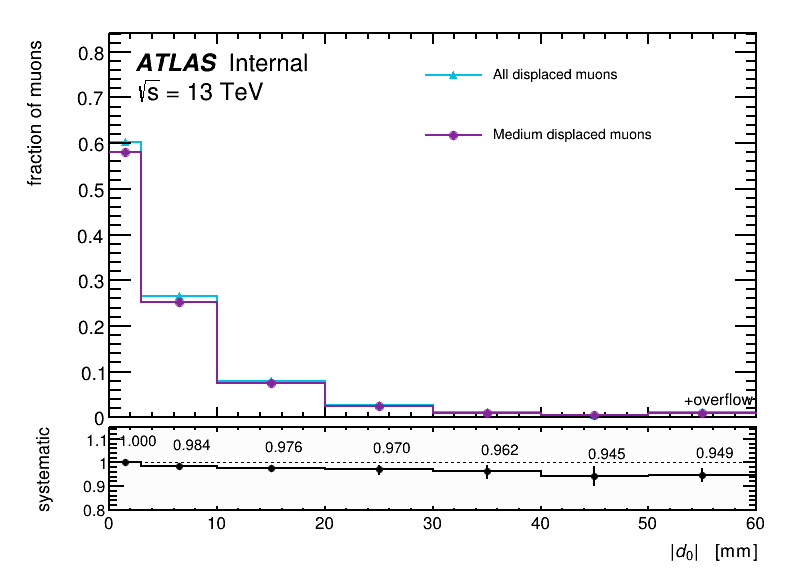

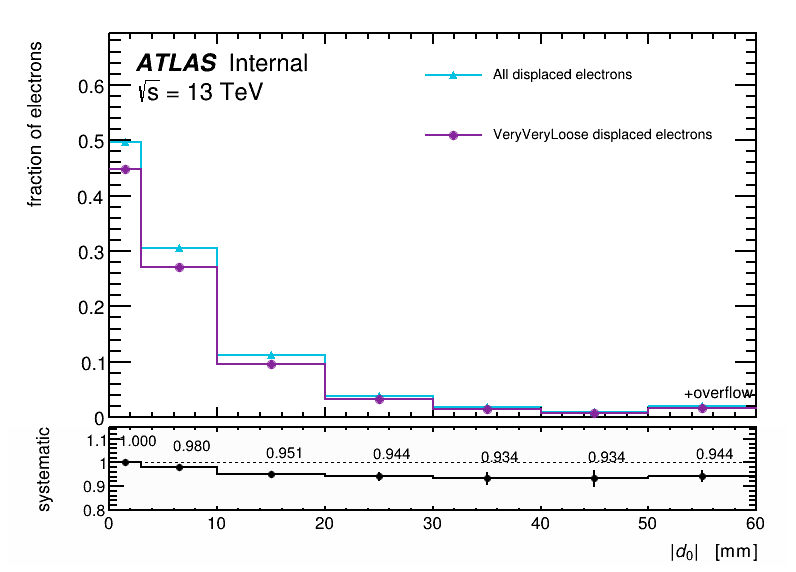

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/displaced_lepton_systematic/png//d0_muon.png has been created
Info in <TCanvas::Print>: eps file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/displaced_lepton_systematic/eps//d0_muon.eps has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/displaced_lepton_systematic/png//d0_electron.png has been created
Info in <TCanvas::Print>: eps file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/displaced_lepton_systematic/eps//d0_electron.eps has been created


In [14]:
# ____________________________________________________________
# define plotting class

class Hist1DRatio(PlotBase):
    def __init__(self, num, denom, lepton, **kwargs):
        super(Hist1DRatio, self).__init__(
            legend_loc = [0.52, 0.71, 0.92, 0.92],
            atlas_loc = [0.17, 0.875],
            extra_lines_loc = [0.17,0.775],
            x_title = '\ |d_0|',
            x_units = 'mm',
            norm = 1,
            )

        # Get histograms (need to return file too because ROOT is ... ROOT)
        # num, denom = get_histograms(filename, lepton)

        self.hists = [num, denom]
        self.lepton = lepton
        self.pad_empty_space(self.hists)
        self.ratio_ymin = 0.8
        self.ratio_ymax = 1.15
        purple = ROOT.TColor().GetColor("#86259B")
        blue = ROOT.TColor().GetColor("#01C0E0")
        self.colors = [purple, blue]
        self.markers = [20, 22]
        
        # self.extra_legend_lines = [lepton]
        self._make_decorations()
        self.y_title = f'fraction of {lepton}s'

        self.set_titles(num)
        self.set_titles(denom)

        for i, h in enumerate(self.hists):
            h.SetMarkerColor( self.colors[i] )
            h.SetMarkerStyle( self.markers[i] )
            h.SetMarkerSize( 1.2 )
            # if hist_type == "uuu_10mm":
            #   h.SetFillColor( color_dict[hist_type] )
            h.SetLineColor( self.colors[i] )

            h.SetLineWidth(2)
            h.GetXaxis().SetTitleOffset(1.2)
            h.GetYaxis().SetTitleOffset(1.2)
            h.GetXaxis().SetTitleSize(.05)
            h.GetYaxis().SetTitleSize(.05)
            h.GetXaxis().SetLabelSize(.05)
            h.GetYaxis().SetLabelSize(.05)
            h.GetXaxis().SetLabelOffset(0.01)

        ratio = num.Clone()
        ratio.Sumw2()
        
        ratio.Divide(denom)

        first_bin = ratio.GetBinContent(1)
        for i in range(1, int(ratio.GetEntries())):
            ratio.SetBinContent(i, ratio.GetBinContent(i)/first_bin)

        # ratio.GetYaxis().SetTitle("Data/MC")
        ratio.GetYaxis().SetTitle("systematic")
        ratio.SetMarkerColor(ROOT.kBlack)
        ratio.SetLineColor(ROOT.kBlack)

        ratio.SetMarkerColor(ROOT.kBlack)
        ratio.SetLineColor(ROOT.kBlack)
        ratio.GetXaxis().SetTitleOffset(1.3)
        ratio.GetYaxis().SetTitleOffset(.37)
        ratio.GetXaxis().SetTitleSize(.14)
        ratio.GetYaxis().SetTitleSize(.14)
        ratio.GetXaxis().SetLabelSize(0.135)
        ratio.GetXaxis().SetLabelOffset(0.03)
        ratio.GetYaxis().SetLabelSize(0.125)
        ratio.GetYaxis().SetNdivisions(505)
        ratio.SetMarkerSize(0.9)

        pad1, pad2 = plot_util.format_2pads_for_ratio(self.canvas)
        num.GetXaxis().SetLabelOffset(0.05)
        denom.GetXaxis().SetLabelOffset(0.05)

        pad1.Draw()
        pad2.Draw()

        pad1.cd()
        if (self.log_scale_y):
            pad1.SetLogy()

        scale = 1/denom.Integral()
        denom.Scale(scale)
        num.Scale(scale)

        self.y_max = denom.GetBinContent(1)*1.4
        self.set_y_axis_bounds(num)
        self.set_y_axis_bounds(denom)

        self.determine_y_axis_title(num, f'{lepton}s')
        self.determine_y_axis_title(denom, f'{lepton}s')

        denom.Draw("hist E")
        num.Draw("hist E same")

        # overflow label
        last_bin = denom.GetNbinsX()
        text = ROOT.TLatex()
        text.SetTextAlign(21)
        text.SetTextColor(ROOT.kBlack)
        text.SetTextSize(0.042)
        text.DrawLatex(denom.GetXaxis().GetBinCenter(last_bin)+1.5, denom.GetBinContent(last_bin)+.015, '+overflow')

        pad1.Update()

        pad2.cd()
        ratio.SetMinimum(self.ratio_ymin)
        ratio.SetMaximum(self.ratio_ymax)
        ratio.Draw("hist E")
        ratio.GetXaxis().SetTitle("\ |d_0|~\mbox{[mm]}");
        # ratio.Draw("text same ")
        
        # line
        line = ROOT.TLine(ratio.GetXaxis().GetXmin(),1,ratio.GetXaxis().GetXmax(),1)
        line.SetLineColor(ROOT.kBlack)
        line.SetLineWidth(1)
        line.SetLineStyle(2)
        line.Draw("same")

        # legend
        if lepton == 'muon':
            self.leg.AddEntry(denom, 'All displaced muons')
            self.leg.AddEntry(num,'Medium displaced muons')
        if lepton == 'electron':
            self.leg.AddEntry(denom, 'All displaced electrons')
            self.leg.AddEntry(num,'VeryVeryLoose displaced electrons')

        pad2.cd()

        text = ROOT.TLatex()
        text.SetTextAlign(21)
        text.SetTextColor(ROOT.kBlack)
        text.SetTextSize(0.12)
        for j in range(ratio.GetNbinsX()+1):
            x  = ratio.GetXaxis().GetBinCenter(j)
            y  = ratio.GetBinContent(j)
            if y != 0.0: 
                text.DrawLatex(x+1.3, max(self.ratio_ymin, y)+.07, f'{y:.3f}')

        self.canvas.Update()
        self.canvas.Modified()
        self.print_to_file('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/displaced_lepton_systematic/png/',f'/d0_{lepton}.png')
        self.print_to_file('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/displaced_lepton_systematic/eps/',f'/d0_{lepton}.eps')
        ratio.SetDirectory(0)
        pad1.Close()
        pad2.Close()
        self.canvas.Close()

        self.ratio = ratio
        self.num = num
        self.denom = denom


h_muon = Hist1DRatio(mu_num, mu_denom, 'muon')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/displaced_lepton_systematic/png/d0_{h_muon.lepton}.png'));
h_electron = Hist1DRatio(el_num, el_denom, 'electron')
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/displaced_lepton_systematic/png/d0_{h_electron.lepton}.png'));


In [12]:
displaced_electron_syst = [h_electron.ratio[i] for i in range(1, h_electron.ratio.GetNbinsX()+1)]
print('displaced_electron_syst =', displaced_electron_syst)
displaced_muon_syst = [h_muon.ratio[i] for i in range(1, h_muon.ratio.GetNbinsX()+1)]
print('displaced_muon_syst =', displaced_muon_syst)


displaced_electron_syst = [1.0, 0.9797765612602234, 0.9509709477424622, 0.9440934658050537, 0.9337978959083557, 0.9336842894554138, 0.943777322769165]
displaced_muon_syst = [1.0, 0.9837234616279602, 0.9758386015892029, 0.9704380035400391, 0.9621100425720215, 0.9447205662727356, 0.9487572908401489]
